In [52]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# 定义device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [54]:
# 读取数据
mnist_train = torchvision.datasets.FashionMNIST(root='E:/Datasets/FashionMNIST', train=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='E:/Datasets/FashionMNIST', train=False, transform=transforms.ToTensor())

batch_size = 256
train_iter = Data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_iter = Data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

In [55]:
# 手搓Dropout（没有使用）
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    
    if dropout == 0:
        return X
    if dropout == 1:
        return torch.zeros(X.shape, dtype=torch.float)
    return (torch.rand(X.shape) > dropout).float() * X / 1 - dropout

In [56]:
# 定义模型
class MLPNet(nn.Module):
    def __init__(self, n_inputs, n_outputs, n_hidden1, n_hidden2, dropout_rate1, dropout_rate2):
        super(MLPNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(n_inputs, n_hidden1)
        self.dropout1 = nn.Dropout(dropout_rate1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.dropout2 = nn.Dropout(dropout_rate2)
        self.linear3 = nn.Linear(n_hidden2, n_outputs)
        
        self.apply(self._init_params)
        
    def _init_params(self, layer):
        if isinstance(layer, nn.Linear):
            nn.init.normal_(layer.weight, mean=0, std=0.01)
            nn.init.constant_(layer.bias, val=0)
    
    def forward(self, X):
        X = self.flatten(X)
        X = self.linear1(X)
        X = torch.relu(X)
        X = self.dropout1(X)
        X = self.linear2(X)
        X = torch.relu(X)
        X = self.dropout2(X)
        X = self.linear3(X)
        
        return X

In [57]:
# 定义评估准确率函数
def evaluate_accuracy(data_iter, net):
    sum_acc = 0.0
    
    for X, y in data_iter:
        X = X.to(device)
        y = y.to(device)
        
        y_hat = net(X)
        acc = (y_hat.argmax(dim=1) == y).float().mean().item()
        sum_acc += acc
    
    return sum_acc / len(data_iter)

In [62]:
# 定义训练函数
def train(n_inputs, n_outputs, n_hidden1, n_hidden2, dropout_rate1, dropout_rate2, n_epochs, lr):
    net = MLPNet(n_inputs, n_outputs, n_hidden1, n_hidden2, dropout_rate1, dropout_rate2)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr)
    loss = nn.CrossEntropyLoss()
    
    losses, train_accs, test_accs = [], [], []
    
    for epoch in range(n_epochs):
        sum_loss = 0.0
        
        for X, y in train_iter:
            X = X.to(device)
            y = y.to(device)
            
            y_hat = net(X)
            l = loss(y_hat, y)
            
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            
            sum_loss += l.item()
        
        cur_loss = sum_loss / len(train_iter)
        train_acc = evaluate_accuracy(train_iter, net)
        test_acc = evaluate_accuracy(test_iter, net)
        losses.append(cur_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f)' % (epoch + 1, cur_loss, train_acc, test_acc))
        
    fig, ax = plt.subplots(figsize=[5, 2.5])
    
    ax.set_xlabel('epoch')
    ax.grid(True)
              
    ax.plot(range(1, n_epochs + 1), losses, c='b', label='loss')
    ax.plot(range(1, n_epochs + 1), train_accs, c='g', linestyle = '--', label='train acc')
    ax.plot(range(1, n_epochs + 1), test_accs, c='purple', linestyle = '-.', label='test acc')
    
    plt.legend()
    plt.show()

epoch 1, loss 1.1762, train acc 0.735, test acc 0.729)
epoch 2, loss 0.5438, train acc 0.809, test acc 0.796)
epoch 3, loss 1.2193, train acc 0.800, test acc 0.790)
epoch 4, loss 0.6078, train acc 0.825, test acc 0.814)
epoch 5, loss 0.4590, train acc 0.819, test acc 0.809)
epoch 6, loss 0.4241, train acc 0.799, test acc 0.784)
epoch 7, loss 0.3988, train acc 0.855, test acc 0.842)
epoch 8, loss 0.3779, train acc 0.840, test acc 0.825)
epoch 9, loss 0.3618, train acc 0.860, test acc 0.840)
epoch 10, loss 0.3499, train acc 0.866, test acc 0.846)
epoch 11, loss 0.3391, train acc 0.865, test acc 0.846)
epoch 12, loss 0.3245, train acc 0.860, test acc 0.839)
epoch 13, loss 0.3203, train acc 0.872, test acc 0.852)
epoch 14, loss 0.3117, train acc 0.887, test acc 0.863)
epoch 15, loss 0.3038, train acc 0.870, test acc 0.855)
epoch 16, loss 0.2940, train acc 0.784, test acc 0.769)
epoch 17, loss 0.3076, train acc 0.889, test acc 0.865)
epoch 18, loss 0.2887, train acc 0.884, test acc 0.860)
e

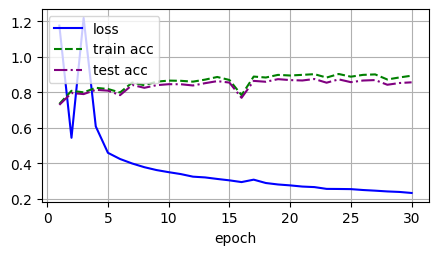

In [70]:
# 不加入Dropout
train(28 * 28, 10, 256, 256, 0, 0, 30, 0.5)

epoch 1, loss 1.0936, train acc 0.766, test acc 0.756)
epoch 2, loss 0.5804, train acc 0.814, test acc 0.802)
epoch 3, loss 0.4865, train acc 0.778, test acc 0.766)
epoch 4, loss 0.4403, train acc 0.850, test acc 0.839)
epoch 5, loss 0.4080, train acc 0.845, test acc 0.823)
epoch 6, loss 0.3925, train acc 0.843, test acc 0.826)
epoch 7, loss 0.3753, train acc 0.858, test acc 0.843)
epoch 8, loss 0.3606, train acc 0.858, test acc 0.836)
epoch 9, loss 0.3496, train acc 0.853, test acc 0.835)
epoch 10, loss 0.3398, train acc 0.871, test acc 0.845)
epoch 11, loss 0.3307, train acc 0.874, test acc 0.852)
epoch 12, loss 0.3213, train acc 0.884, test acc 0.863)
epoch 13, loss 0.3148, train acc 0.877, test acc 0.855)
epoch 14, loss 0.3096, train acc 0.864, test acc 0.849)
epoch 15, loss 0.3022, train acc 0.872, test acc 0.843)
epoch 16, loss 0.2970, train acc 0.856, test acc 0.835)
epoch 17, loss 0.2948, train acc 0.892, test acc 0.866)
epoch 18, loss 0.2877, train acc 0.871, test acc 0.847)
e

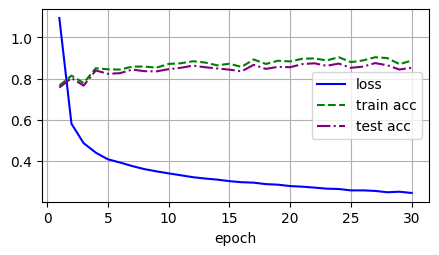

In [71]:
# 加入Dropout
train(28 * 28, 10, 256, 256, 0.2, 0.5, 30, 0.5)

epoch 1, loss 1.1465, train acc 0.736, test acc 0.730)
epoch 2, loss 0.6031, train acc 0.774, test acc 0.763)
epoch 3, loss 0.5097, train acc 0.815, test acc 0.799)
epoch 4, loss 0.4717, train acc 0.820, test acc 0.806)
epoch 5, loss 0.4428, train acc 0.829, test acc 0.819)
epoch 6, loss 0.4246, train acc 0.848, test acc 0.830)
epoch 7, loss 0.4080, train acc 0.834, test acc 0.817)
epoch 8, loss 0.3983, train acc 0.839, test acc 0.822)
epoch 9, loss 0.3859, train acc 0.790, test acc 0.768)
epoch 10, loss 0.3775, train acc 0.862, test acc 0.846)


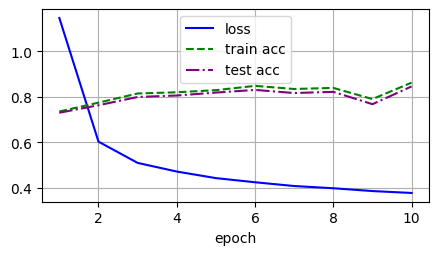

In [65]:
# 交换Dropout Rate
train(28 * 28, 10, 256, 256, 0.5, 0.2, 10, 0.5)

epoch 1, loss 2.3030, train acc 0.100, test acc 0.099)
epoch 2, loss 2.3030, train acc 0.100, test acc 0.099)
epoch 3, loss 2.3032, train acc 0.100, test acc 0.098)
epoch 4, loss 2.3031, train acc 0.100, test acc 0.101)
epoch 5, loss 2.3030, train acc 0.100, test acc 0.101)
epoch 6, loss 2.3031, train acc 0.100, test acc 0.102)
epoch 7, loss 2.3031, train acc 0.100, test acc 0.099)
epoch 8, loss 2.3031, train acc 0.100, test acc 0.102)
epoch 9, loss 2.3032, train acc 0.100, test acc 0.099)
epoch 10, loss 2.3030, train acc 0.100, test acc 0.098)


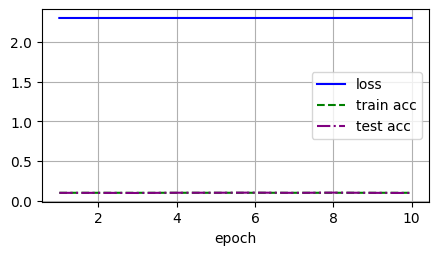

In [66]:
# Dropout Rate设为1
train(28 * 28, 10, 256, 256, 1, 1, 10, 0.5)